In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

gold_yellow = "#FFC000"
city = "Montpellier"

plt.style.use("dark_background")

In [3]:
df = gpd.read_file("../data/master.geojson")

In [4]:
df.head()

,codgeo,dep,reg,xcl2154,ycl2154,libgeo,net_salary,population,distance_to_angers,distance_to_avignon,...,distance_to_rennes,distance_to_rouen,distance_to_saintbrieuc,distance_to_saintetienne,distance_to_strasbourg,distance_to_toulouse,distance_to_tours,dist_min,closest_metropolis,geometry
0,01004,01,84,882724.0,6542583.0,Ambérieu-en-Bugey,13.7,13460.0,481.386634,227.390682,...,585.373385,501.891964,676.571427,95.057840,342.181840,405.256373,390.767916,45.879279,Lyon,"POLYGON ((5.38637 45.93121, 5.38892 45.93320, ..."
1,01007,01,84,882682.0,6548067.0,Ambronay,13.5,2563.0,479.423210,232.793303,...,583.044624,497.657430,674.146914,98.542071,337.432535,408.804303,388.531487,48.741451,Lyon,"POLYGON ((5.40440 46.00778, 5.39779 46.01009, ..."
2,01014,01,84,906407.0,6580780.0,Arbent,13.5,3281.0,491.910607,269.530737,...,592.430505,489.484950,682.573590,138.224859,297.286527,448.270671,399.360905,87.894148,Lyon,"POLYGON ((5.71332 46.25667, 5.71983 46.25783, ..."
3,01024,01,84,866161.0,6578890.0,Attignat,12.9,3329.0,453.855171,261.397017,...,555.654896,463.493880,646.263640,111.697209,320.269383,417.976502,361.838430,63.123904,Lyon,"POLYGON ((5.16256 46.25622, 5.16464 46.25629, ..."
4,01025,01,84,849782.0,6581485.0,Bâgé-la-Ville,13.0,3142.0,437.452133,263.172045,...,539.526669,450.918833,630.241338,106.570254,327.904742,408.624114,345.563023,61.578670,Lyon,"POLYGON ((4.92091 46.30781, 4.92544 46.31070, ..."


In [5]:
df_temp = df[df["closest_metropolis"] == city]
df_temp.shape

(207, 45)

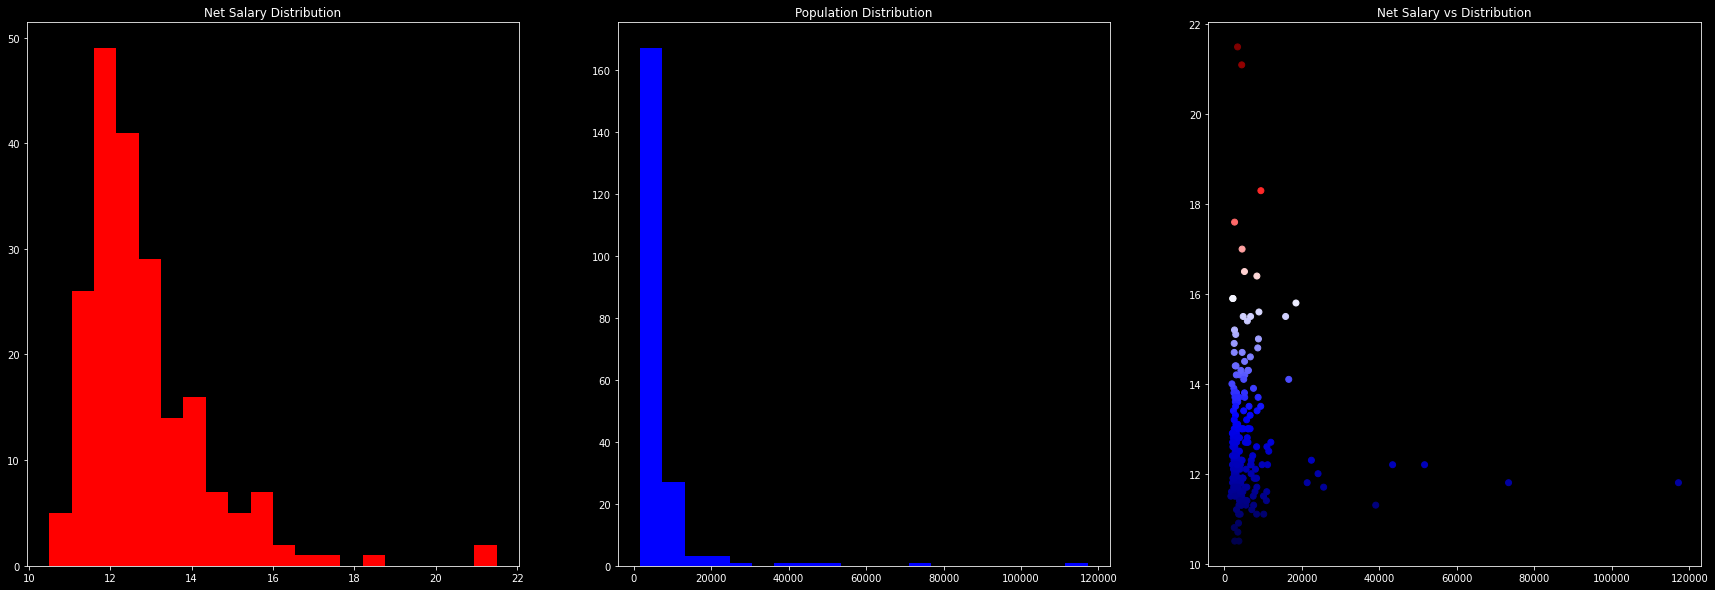

In [6]:
df_temp = df[df["closest_metropolis"] == city]
df_temp = df_temp[df_temp["libgeo"] != city]
# df_temp = df_temp[df_temp["population"] < 20000]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

axes[0].hist(
    df_temp["net_salary"],
    bins=20,
    color="red"
)

axes[0].set_title("Net Salary Distribution")

axes[1].hist(
    df_temp["population"],
    bins=20,
    color="b"
)
axes[1].set_title("Population Distribution")

axes[2].scatter(
    df_temp["population"],
    df_temp["net_salary"],
    cmap="seismic",
    c=df_temp["net_salary"]
)
axes[2].set_title("Net Salary vs Distribution")

plt.show()

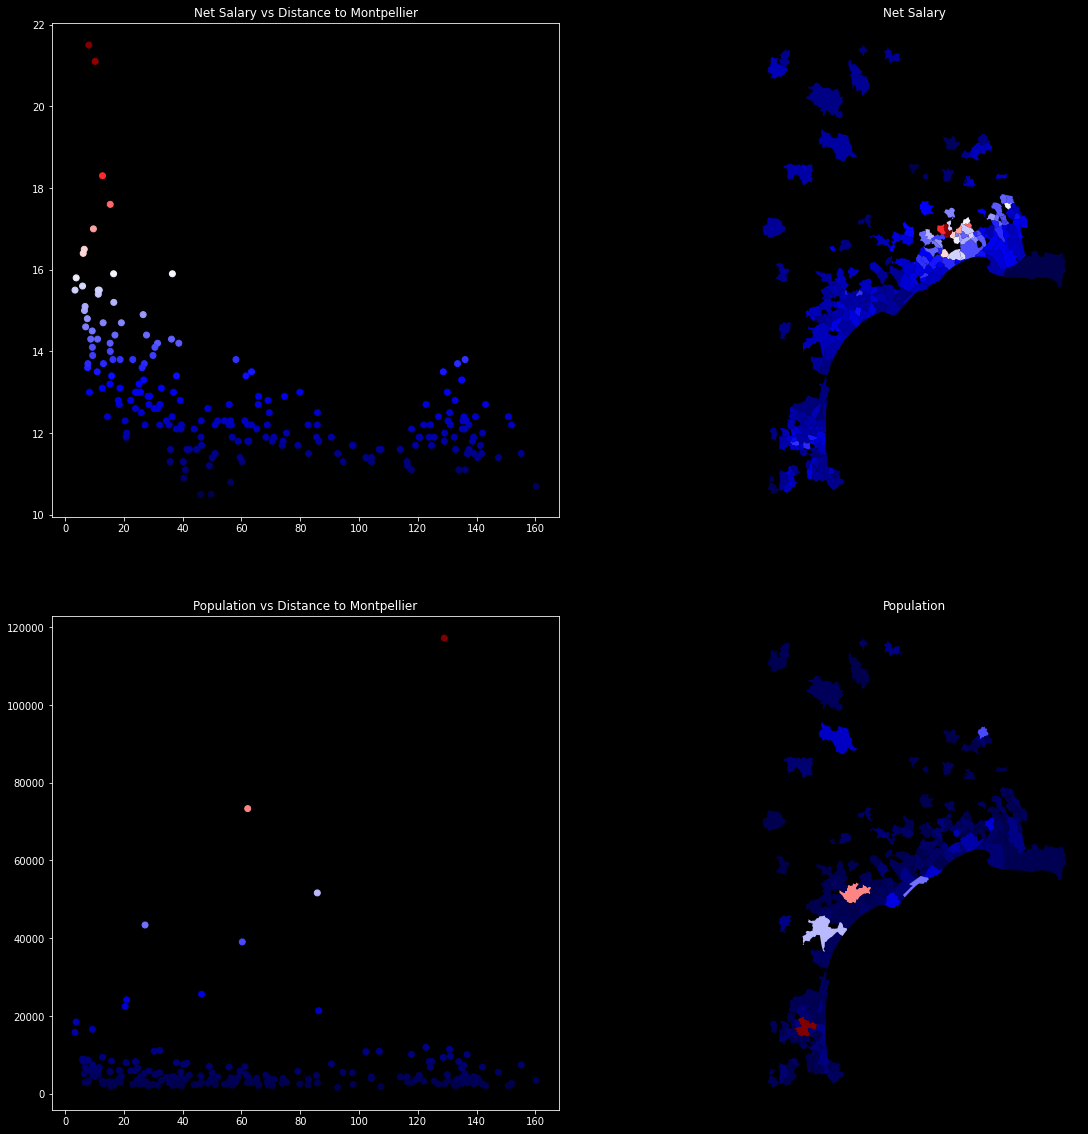

In [7]:
df_temp = df[df["closest_metropolis"] == city]
df_temp = df_temp[df_temp["libgeo"] != city]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

axes[0, 0].scatter(
    df_temp["dist_min"],
    df_temp["net_salary"],
    c=df_temp["net_salary"],
    cmap="seismic"
)

axes[0, 0].set_title(f"Net Salary vs Distance to {city}")


axes[1, 0].scatter(
    df_temp["dist_min"],
    df_temp["population"],
    c=df_temp["population"],
    cmap="seismic",
)

axes[1, 0].set_title(f"Population vs Distance to {city}")


df_temp.plot(
    df_temp["net_salary"],
    ax=axes[0, 1],
    cmap="seismic"
)

axes[0, 1].axis("off")
axes[0, 1].set_title("Net Salary")

df_temp.plot(
    df_temp["population"],
    ax=axes[1, 1],
    cmap="seismic"
)

axes[1, 1].axis("off")
axes[1, 1].set_title("Population")

plt.show()


In [8]:
df_temp.sort_values("population", ascending=False).head()

,codgeo,dep,reg,xcl2154,ycl2154,libgeo,net_salary,population,distance_to_angers,distance_to_avignon,...,distance_to_rennes,distance_to_rouen,distance_to_saintbrieuc,distance_to_saintetienne,distance_to_strasbourg,distance_to_toulouse,distance_to_tours,dist_min,closest_metropolis,geometry
3306,66136,66,76,691347.0,6177762.0,Perpignan,11.8,117199.0,595.183711,208.206032,...,699.466228,762.042099,781.786804,327.169357,754.074360,155.124096,549.295178,129.029924,Montpellier,"POLYGON ((2.82629 42.69075, 2.82695 42.68959, ..."
1395,34032,34,76,717351.0,6249340.0,Béziers,11.8,73343.0,544.737751,145.036368,...,652.039210,696.931343,737.540028,251.029484,678.841243,146.165169,491.083493,62.154314,Montpellier,"POLYGON ((3.24127 43.39894, 3.24023 43.39430, ..."
317,11262,11,76,700310.0,6231627.0,Narbonne,12.2,51663.0,551.455849,168.618783,...,657.597259,710.702872,741.875908,273.882381,702.663036,134.788866,501.252652,85.816980,Montpellier,"POLYGON ((3.06416 43.20059, 3.06756 43.21173, ..."
1474,34301,34,76,756390.0,6256124.0,Sète,12.2,43408.0,560.553380,108.209945,...,669.277205,700.128816,756.370060,233.021559,654.499072,183.542540,501.557431,27.233035,Montpellier,"POLYGON ((3.66201 43.42476, 3.64304 43.41491, ..."
1076,30007,30,76,786228.0,6336826.0,Alès,11.3,39052.0,516.766635,61.522323,...,627.223887,632.933163,717.026931,148.106052,569.074340,219.453278,448.155689,60.297299,Montpellier,"POLYGON ((4.06038 44.14029, 4.05849 44.13585, ..."


In [11]:

# rng = np.random.default_rng(1234)

def simulate_net_salary(
    xs,
    y0=12,
    base=12,
    alpha=0.07
):
    return (
        np.exp(- alpha * xs) * y0 + base
    )



In [12]:
from itertools import product

def grid_optimizer(alphas, y0s, bases, xs, ys, opt_function):
    
    best_score, best_params = 10, {}
    
    for alpha, y0, base in tqdm(product(alphas, y0s, bases)):
        predictions = simulate_net_salary(xs=xs, y0=y0, base=base, alpha=alpha)
        residuals = ys - predictions
        score = opt_function(residuals)
        if  score < best_score:
            best_params = {"alpha": alpha, "y0": y0, "base": base}
            best_score = score
    return best_score, best_params

def metric_function(residuals):
    return np.mean(np.abs(residuals))


best_score, best_params = grid_optimizer(
    alphas=[0.01 * i for i in range(1, 11)],
    y0s=[12 + i for i in range(8)],
    bases=[10, 11, 12, 13],
    opt_function=metric_function,
    xs=df_temp["dist_min"],
    ys=df_temp["net_salary"]
)

print(best_score / df_temp["net_salary"].mean())
best_params

320it [00:00, 1719.25it/s]

0.0689316157762106


{'alpha': 0.1, 'y0': 12, 'base': 12}

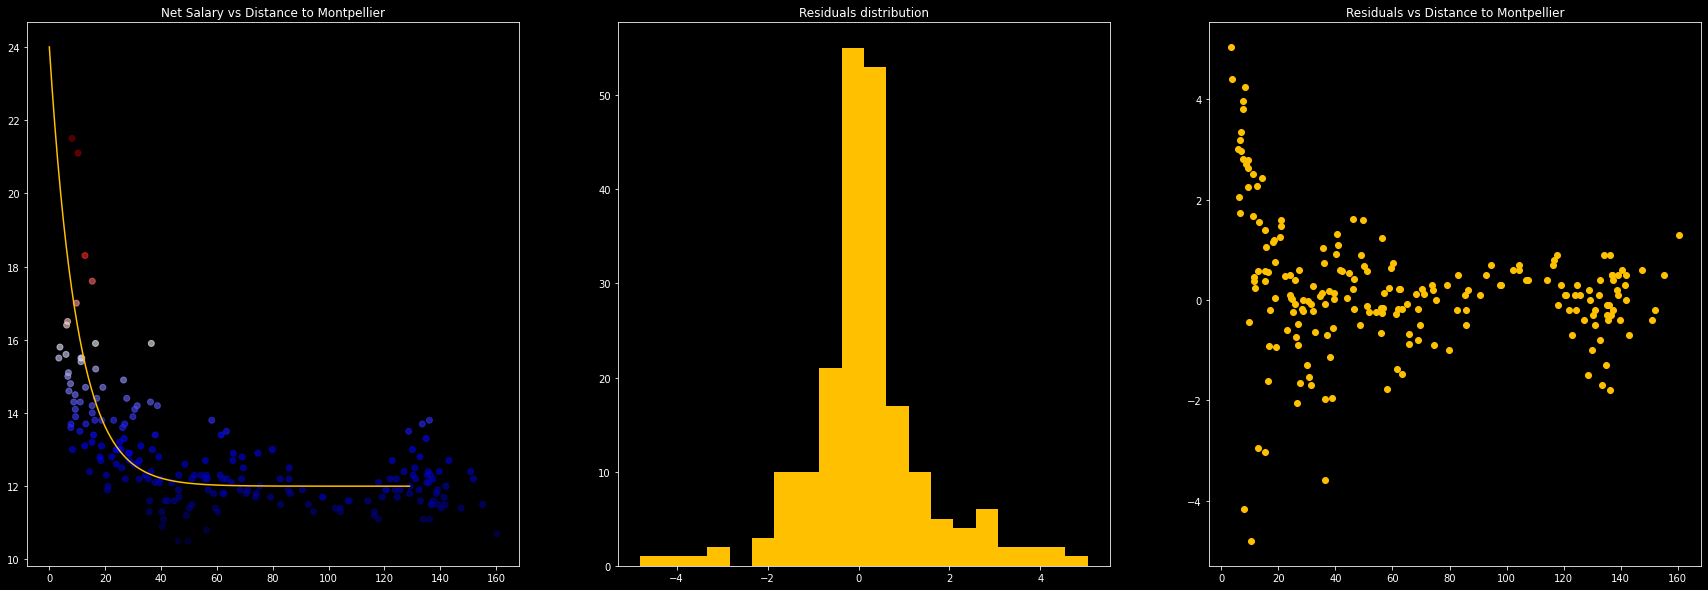

In [13]:
predictions = simulate_net_salary(df_temp["dist_min"], **best_params)

residuals = predictions - df_temp["net_salary"]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

axes[0].scatter(
    df_temp["dist_min"],
    df_temp["net_salary"],
    c=df_temp["net_salary"],
    cmap="seismic",
    alpha=.6
)

axes[0].plot(
    np.arange(130),
    simulate_net_salary(np.arange(130), **best_params),
    c=gold_yellow
)

axes[1].hist(
    residuals,
    color=gold_yellow,
    bins=20
)

axes[2].scatter(
    df_temp["dist_min"],
    residuals,
    color=gold_yellow
)

axes[0].set_title(f"Net Salary vs Distance to {city}")
axes[1].set_title("Residuals distribution")
axes[2].set_title(f"Residuals vs Distance to {city}")


plt.show()

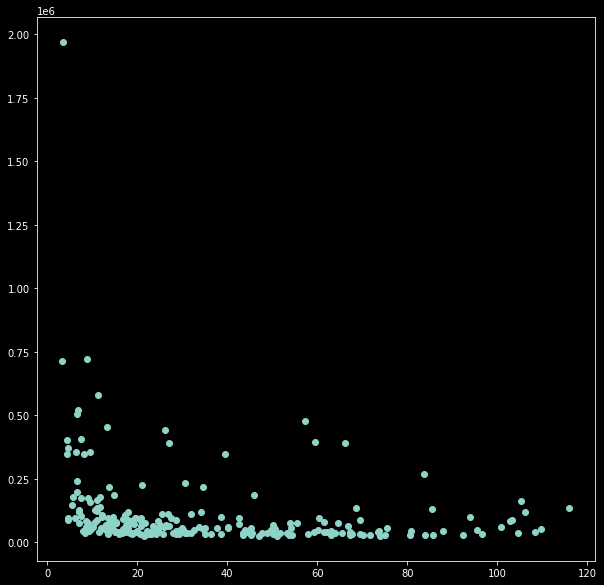

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.scatter(
    df_temp["dist_min"],
    df_temp["population"] * df_temp["net_salary"],
)

plt.show()